In [66]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.metrics import mean_squared_error, classification_report

import warnings
warnings.filterwarnings('ignore')

In [67]:
df=pd.read_csv("train.csv")
df.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

In [69]:
df.describe()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000
max,2018.000000,12.000000,31.000000,23.000000,30.000000,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.700000,360.000000,12.900000,100.000000


In [70]:
df.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [71]:
df.duplicated().sum()

0

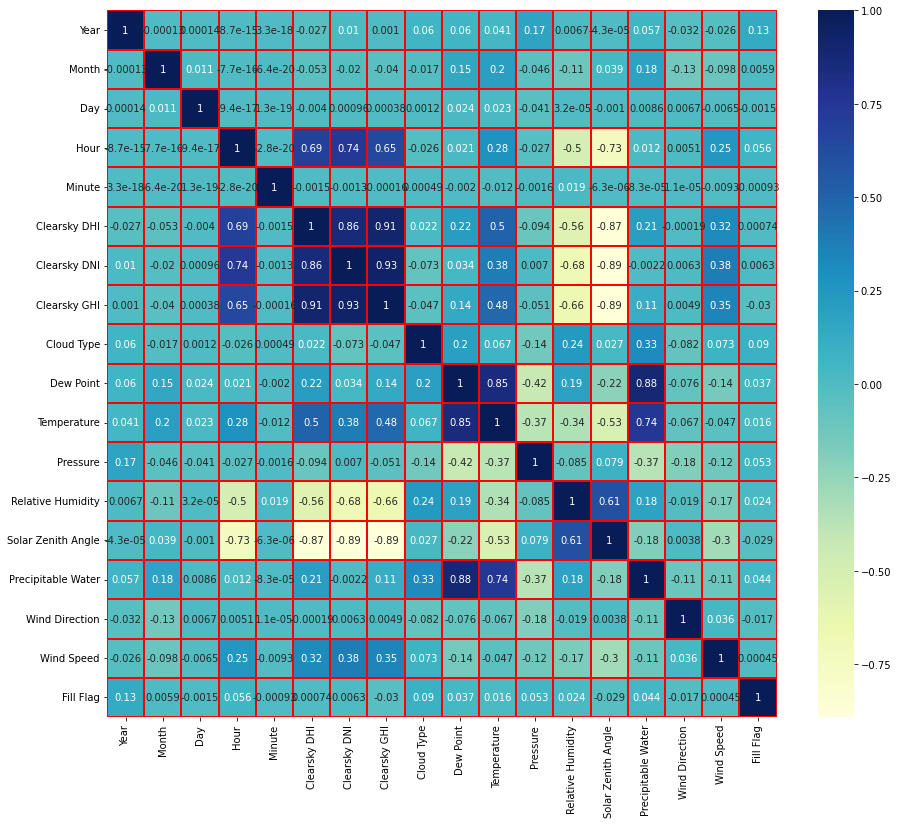

In [72]:
plt.figure(figsize= (15,13))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True, linewidth= 1, linecolor= 'red' )

In [73]:
def plot_relation(col_name_x, col_name_y, df):
    plt.figure(figsize=(15,10))
    sns.barplot(x= col_name_x, y= col_name_y, data=df)

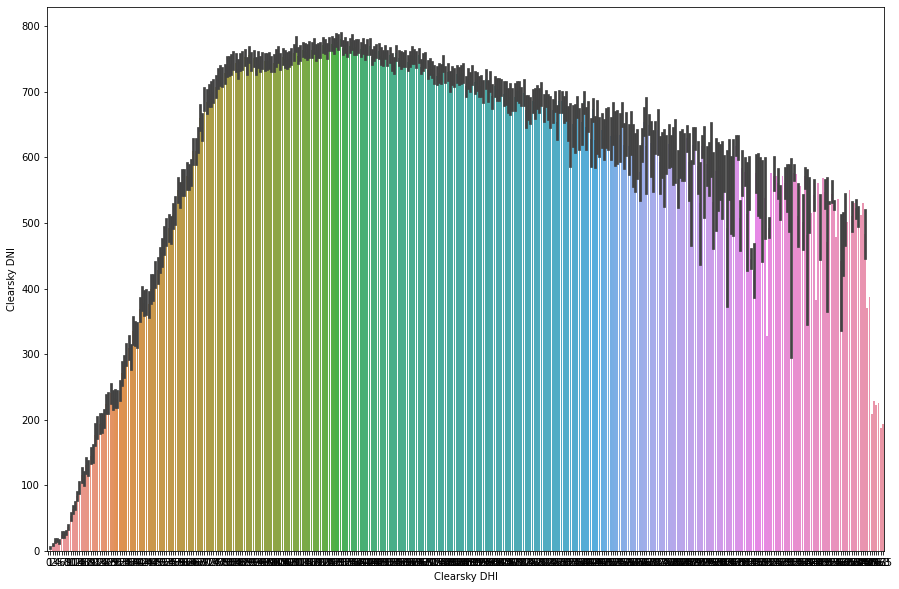

In [74]:
plot_relation('Clearsky DHI', 'Clearsky DNI', df)

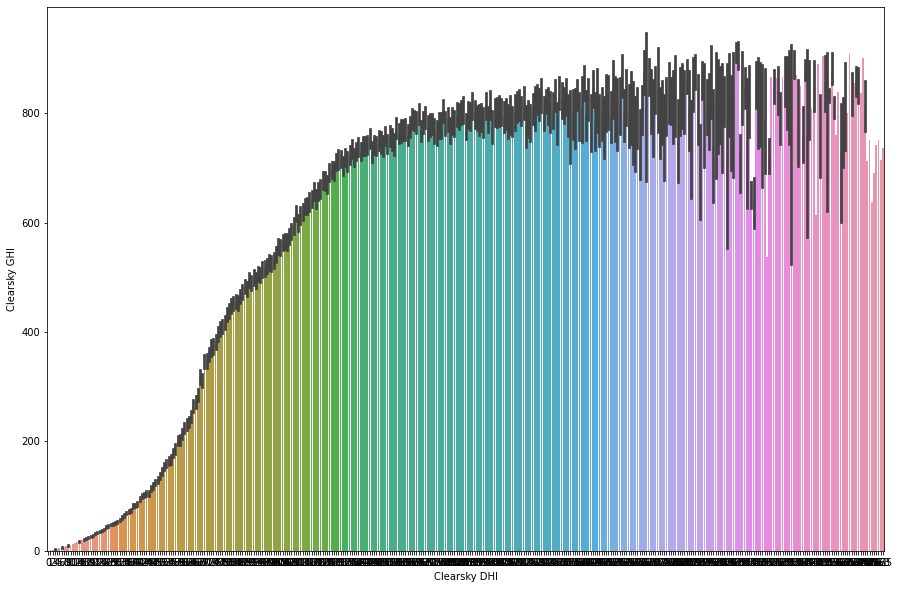

In [75]:
plot_relation('Clearsky DHI', 'Clearsky GHI', df)

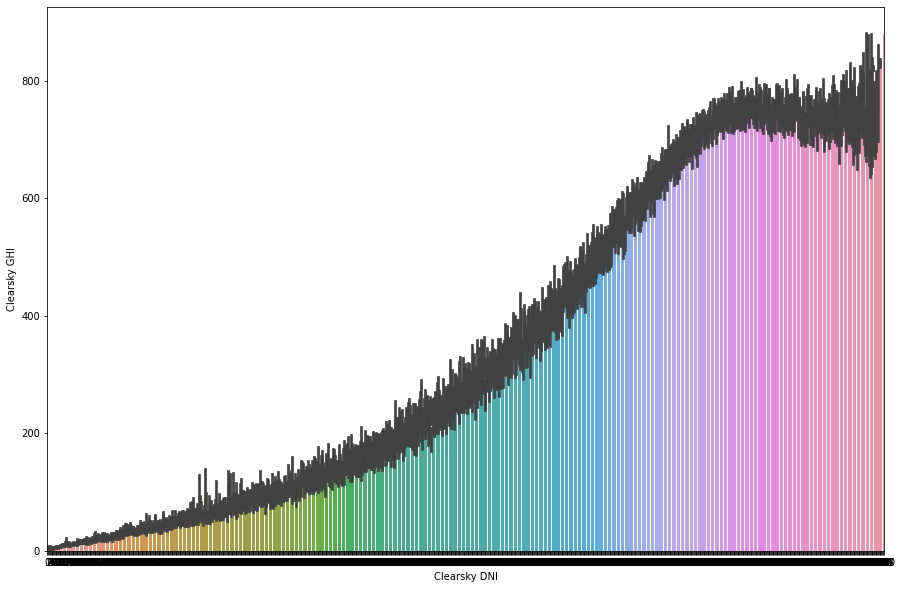

In [76]:
plot_relation('Clearsky DNI', 'Clearsky GHI', df)

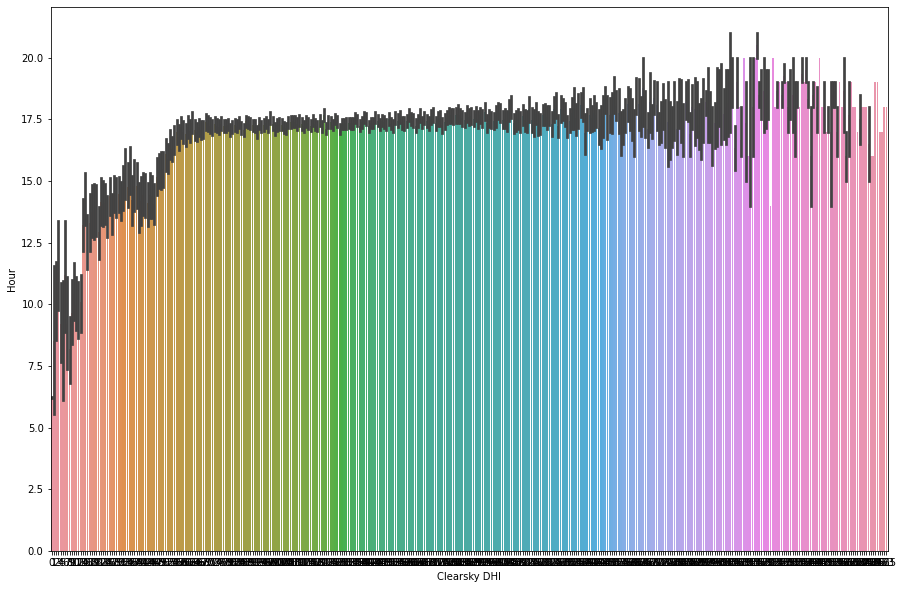

In [77]:
plot_relation('Clearsky DHI', 'Hour', df)

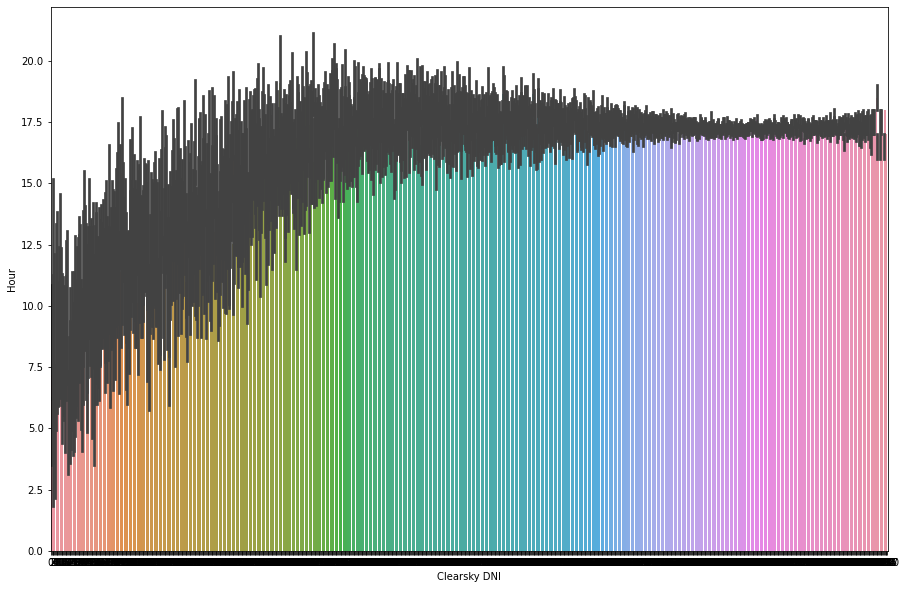

In [78]:
plot_relation('Clearsky DNI', 'Hour', df)

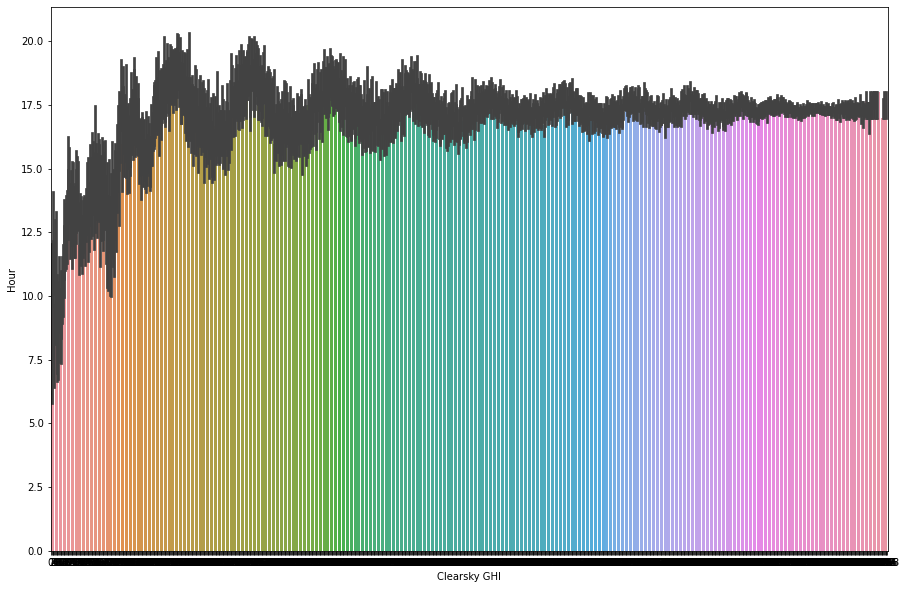

In [79]:
plot_relation('Clearsky GHI', 'Hour', df)

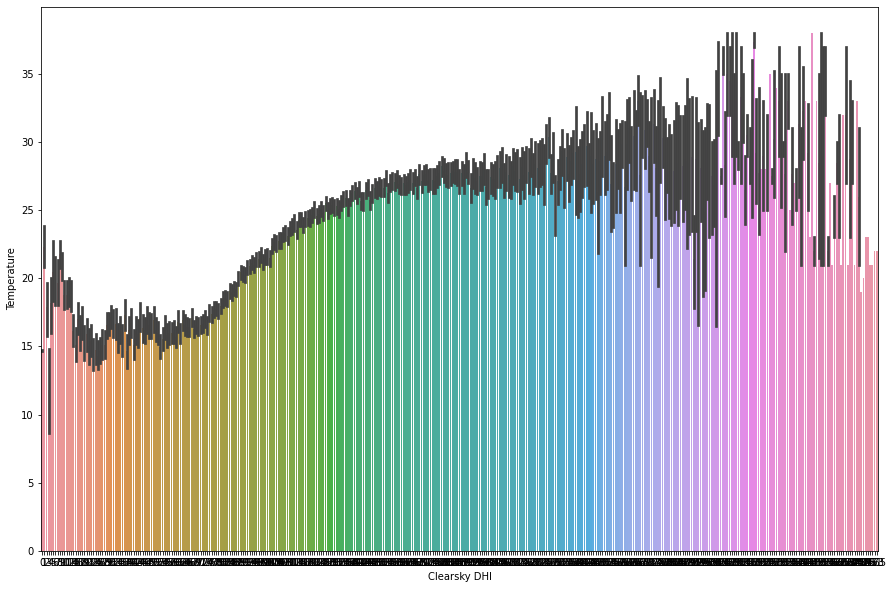

In [80]:
plot_relation('Clearsky DHI', 'Temperature', df)

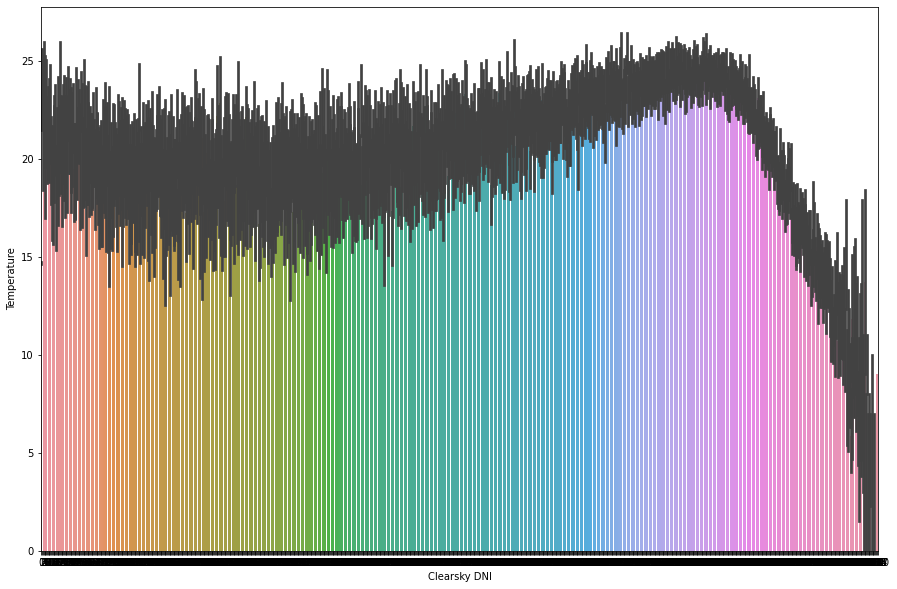

In [81]:
plot_relation('Clearsky DNI', 'Temperature', df)

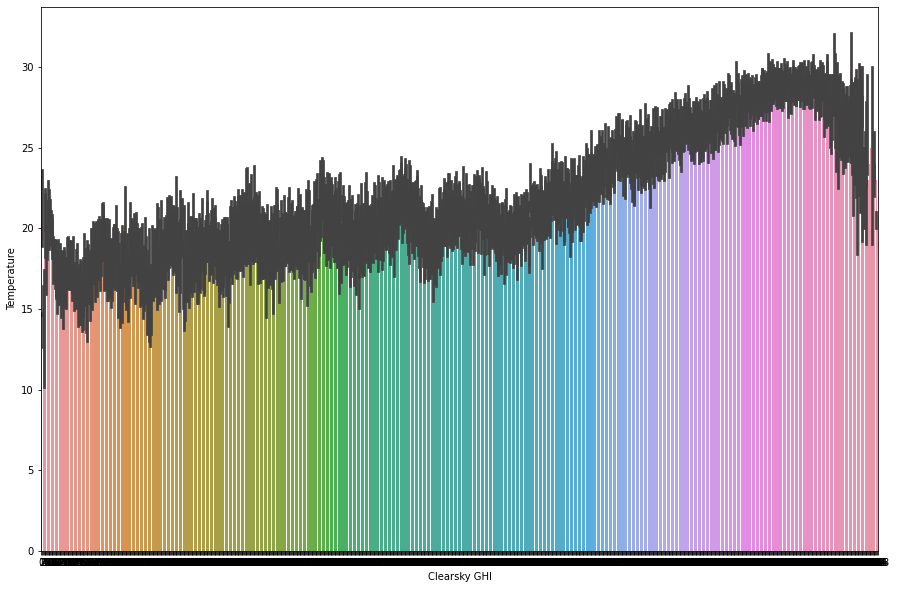

In [82]:
plot_relation('Clearsky GHI', 'Temperature', df)

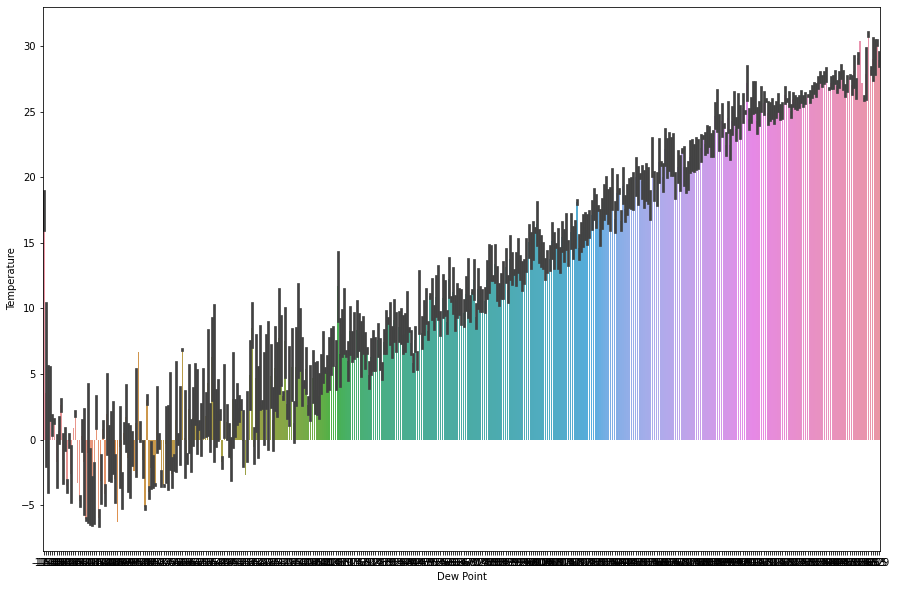

In [83]:
plot_relation('Dew Point', 'Temperature', df)

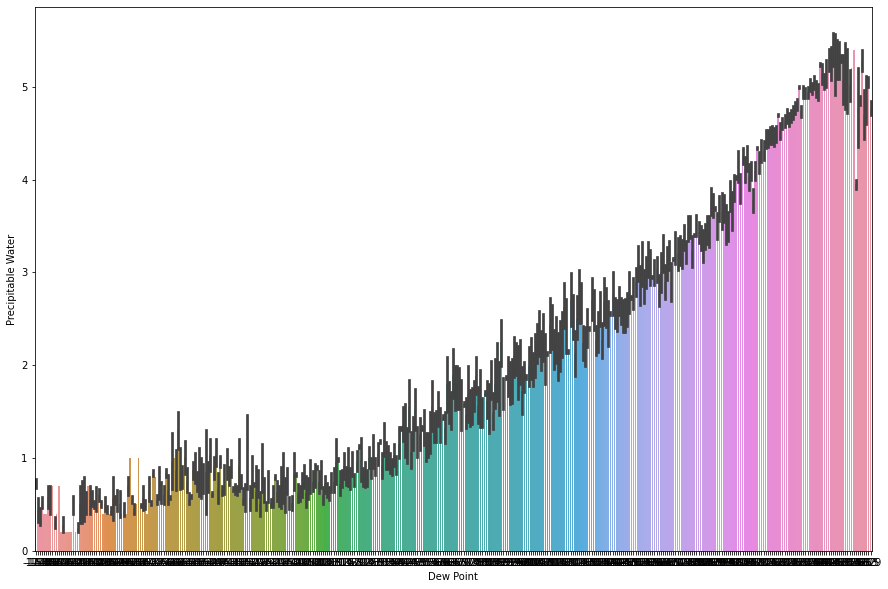

In [84]:
plot_relation('Dew Point', 'Precipitable Water', df)

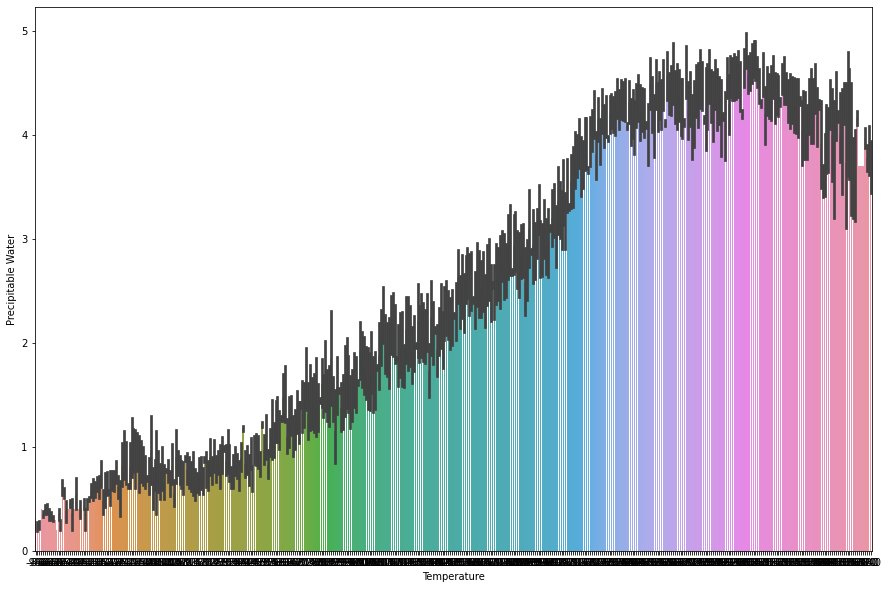

In [85]:
plot_relation('Temperature', 'Precipitable Water', df)

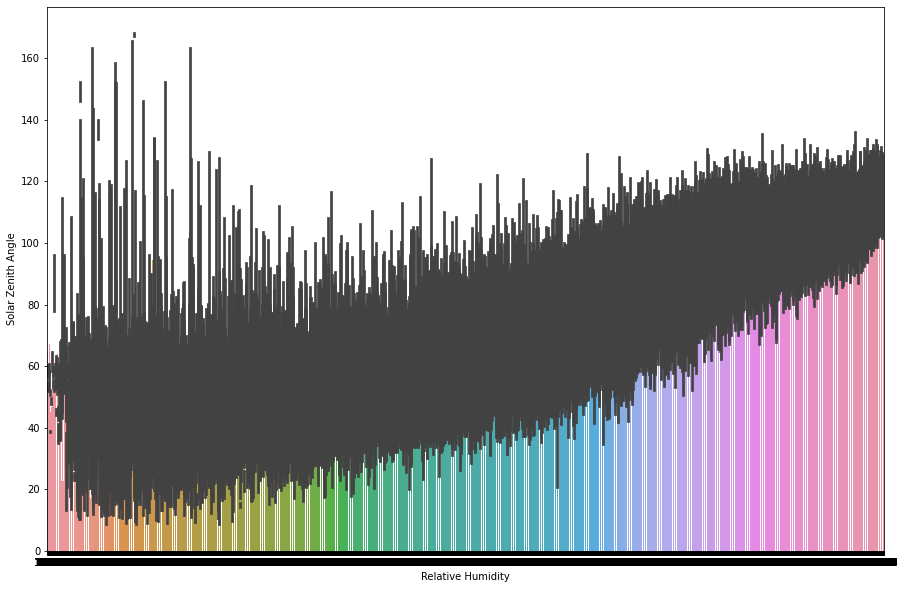

In [86]:
plot_relation('Relative Humidity', 'Solar Zenith Angle', df)

In [87]:
df_train = df[df.Year!=2018]
df_test = df[df.Year==2018]

In [88]:
df_train.sample(10)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
29189,2010,9,1,2,30,0,0,0,1,20.0,23.0,1000,83.27,120.19,2.735,93.0,1.6,0
28571,2010,8,19,5,30,0,0,0,7,24.0,25.0,1000,96.69,135.29,6.321,213.6,1.7,1
30363,2010,9,25,13,30,99,625,365,0,20.0,28.0,1000,65.03,64.83,4.330,206.7,1.7,0
152663,2017,9,16,11,30,9,34,9,1,22.0,22.0,1000,100.00,88.73,4.908,82.7,1.6,0
134320,2016,8,30,8,0,0,0,0,1,21.0,23.0,1000,93.81,126.74,4.376,73.7,1.6,0
152684,2017,9,16,22,0,101,497,274,8,21.0,28.0,1000,69.16,69.74,4.616,71.9,1.3,4
14409,2009,10,28,4,30,0,0,0,7,21.0,21.0,1000,100.00,158.15,3.761,224.4,3.2,0
147771,2017,6,6,13,30,120,684,519,8,22.0,23.0,990,99.11,54.34,5.494,197.4,0.7,0
121511,2015,12,7,11,30,0,0,0,0,4.0,5.0,1010,100.00,101.05,1.372,13.4,1.0,0
54144,2012,2,3,0,0,0,0,0,0,13.0,15.0,1010,95.21,100.99,1.683,1.5,1.2,0


In [89]:
df_test.sample(10)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
171289,2018,10,9,12,30,65,326,126,3,22.5,23.4,1006,94.63,79.20,4.6,63.0,3.8,75
171831,2018,10,20,19,30,103,785,581,8,21.0,27.6,1003,67.18,52.53,4.7,273.0,4.1,0
164334,2018,5,17,15,0,110,843,790,3,20.5,26.8,1001,68.52,36.18,4.5,281.0,1.6,0
175101,2018,12,27,22,30,12,44,13,7,16.1,16.3,1009,98.69,88.78,4.3,108.0,3.1,57
158592,2018,1,18,0,0,0,0,0,0,-12.1,-4.2,1019,54.00,103.62,0.2,324.0,4.1,0
171161,2018,10,6,20,30,99,754,500,0,15.8,33.5,1006,34.68,57.88,3.2,103.0,2.6,0
162616,2018,4,11,20,0,128,872,790,0,6.1,22.6,1010,34.39,40.65,1.2,349.0,3.0,0
158097,2018,1,7,16,30,77,934,588,0,-11.1,4.9,1022,30.39,56.80,0.7,88.0,4.2,0
164156,2018,5,13,22,0,148,541,409,0,16.8,32.0,1005,40.25,61.18,3.7,129.0,1.8,11
172932,2018,11,12,18,0,122,774,613,8,12.6,13.9,1007,91.85,50.60,4.5,105.0,3.5,0


# DNI

In [90]:
X_train = df_train.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
DNI_train = df_train['Clearsky DNI'].values
X_test = df_test.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
DNI_test = df_test['Clearsky DNI'].values

In [91]:
linr = LinearRegression()
clf = linr.fit(X_train, DNI_train)
DNI_pred = clf.predict(X_test)
DNI_pred

array([ 155.82509054,  112.09467605,   87.61352598, ..., -498.16582582,
        356.06983726,  323.65923646])

In [92]:
MSE=mean_squared_error(DNI_test, DNI_pred)
MSE

114893.458850169

In [93]:
RMSE = np.sqrt(MSE)
RMSE

338.95937640102096

In [94]:
dtc = DecisionTreeClassifier()
dtc_clf = dtc.fit(X_train, DNI_train)
DNI_pred1 = dtc_clf.predict(X_test)
DNI_pred1

array([ 0,  0,  0, ..., 34,  0,  0])

In [95]:
print(mean_squared_error(DNI_test, DNI_pred1))

3294.1551369863014


In [96]:
print(np.sqrt(mean_squared_error(DNI_test, DNI_pred1)))

57.39473091657719


In [97]:
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train, DNI_train)
DNI_pred2 = xgbr_clf.predict(X_test)
DNI_pred2

[09:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-0.354034 ,  1.7617888,  1.7749846, ..., 84.7803   ,  3.7827775,
        2.4530003], dtype=float32)

In [98]:
print(mean_squared_error(DNI_test, DNI_pred2))

1623.8387741156273


In [99]:
print(np.sqrt(mean_squared_error(DNI_test, DNI_pred2)))

40.29688293299653


# DHI

In [100]:
X_train = df_train.drop(columns=['Year','Clearsky DHI','Clearsky GHI'])
DHI_train = df_train['Clearsky DHI'].values
X_test = df_test.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
X_test.insert(4, "Clearsky DNI", DNI_pred2)
DHI_test = df_test['Clearsky DHI'].values

In [101]:
linr = LinearRegression()
clf = linr.fit(X_train, DHI_train)
DHI_pred = clf.predict(X_test)
DHI_pred

array([ 10.78096437,   6.00858386,   1.318635  , ..., -75.83185141,
        30.56839204,  27.01502588])

In [102]:
MSE=mean_squared_error(DHI_test, DHI_pred)
MSE

1973.4145306290561

In [103]:
RMSE = np.sqrt(MSE)
RMSE

44.423130581140455

In [104]:
dtc = DecisionTreeClassifier()
dtc_clf = dtc.fit(X_train, DHI_train)
DHI_pred1 = dtc_clf.predict(X_test)
DHI_pred1

array([ 0,  0,  0, ..., 12,  0,  0])

In [105]:
print(mean_squared_error(DHI_test, DHI_pred1))

246.95296803652968


In [106]:
print(np.sqrt(mean_squared_error(DHI_test, DHI_pred1)))

15.714737288180471


In [107]:
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train, DHI_train)
DHI_pred2 = xgbr_clf.predict(X_test)
DHI_pred2

[09:14:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ 0.35158825,  3.4514205 ,  3.4720774 , ..., 13.471782  ,
        3.7770736 ,  3.7770736 ], dtype=float32)

In [108]:
print(mean_squared_error(DHI_test, DHI_pred2))

232.9748683020535


In [109]:
print(np.sqrt(mean_squared_error(DHI_test, DHI_pred2)))

15.263514284136976


# GHI

In [110]:
X_train = df_train.drop(columns=['Year','Clearsky GHI'])
GHI_train = df_train['Clearsky GHI'].values
X_test = df_test.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
X_test.insert(4, "Clearsky DHI", DHI_pred2)
X_test.insert(5,'Clearsky DNI',DNI_pred2)
GHI_test = df_test['Clearsky GHI'].values

In [111]:
linr = LinearRegression()
clf = linr.fit(X_train, GHI_train)
GHI_pred = clf.predict(X_test)
GHI_pred

array([  40.72875326,   41.0790585 ,   26.47617547, ..., -994.21841572,
        -96.16706198, -102.83750924])

In [112]:
MSE=mean_squared_error(GHI_test, GHI_pred)
MSE

117143.97574894644

In [113]:
RMSE = np.sqrt(MSE)
RMSE

342.26302129933117

In [114]:
dtc = DecisionTreeClassifier()
dtc_clf = dtc.fit(X_train, GHI_train)
GHI_pred1 = dtc_clf.predict(X_test)
GHI_pred1

array([ 0,  0,  0, ..., 16,  0,  0])

In [115]:
print(mean_squared_error(GHI_test, GHI_pred1))

81.80171232876712


In [116]:
print(np.sqrt(mean_squared_error(GHI_test, GHI_pred1)))

9.04442990623329


In [117]:
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train, GHI_train)
GHI_pred2 = xgbr_clf.predict(X_test)
GHI_pred2

[09:15:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ 0.4027269,  2.0632834,  2.0632834, ..., 14.875052 ,  3.1318746,
        3.1318746], dtype=float32)

In [118]:
print(mean_squared_error(GHI_test, GHI_pred2))

76.32301389880949


In [119]:
print(np.sqrt(mean_squared_error(GHI_test, GHI_pred2)))

8.736304361617073


In [120]:
df_sub = pd.read_csv("test.csv")
df_sub.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [121]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                17520 non-null  int64  
 1   Month               17520 non-null  int64  
 2   Day                 17520 non-null  int64  
 3   Hour                17520 non-null  int64  
 4   Minute              17520 non-null  int64  
 5   Cloud Type          17520 non-null  int64  
 6   Dew Point           17520 non-null  float64
 7   Temperature         17520 non-null  float64
 8   Pressure            17520 non-null  int64  
 9   Relative Humidity   17520 non-null  float64
 10  Solar Zenith Angle  17520 non-null  float64
 11  Precipitable Water  17520 non-null  float64
 12  Wind Direction      17520 non-null  int64  
 13  Wind Speed          17520 non-null  float64
 14  Fill Flag           17520 non-null  int64  
 15  Clearsky DHI        0 non-null      float64
 16  Clea

In [122]:
df_sub.isna().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Direction            0
Wind Speed                0
Fill Flag                 0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

In [123]:
df.duplicated().sum()

0

In [124]:
df_sub = df_sub.drop(columns=['Clearsky DHI','Clearsky DNI','Clearsky GHI'])

# Train DNI

In [ ]:
X_train = df.drop(columns=['Year','Clearsky DHI','Clearsky DNI','Clearsky GHI'])
DNI_train = df['Clearsky DNI'].values
X_test = df_sub.drop(columns=['Year'])
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train, DNI_train)

DNI_pred = xgbr_clf.predict(X_test)
DNI_pred = np.where(DNI_pred<0,0,DNI_pred)

# Train DHI

In [ ]:
X_train = df.drop(columns=['Year','Clearsky DHI','Clearsky GHI'])
DHI_train = df['Clearsky DHI'].values
X_test = df_sub.drop(columns=['Year'])
X_test.insert(4, "Clearsky DNI", DNI_pred)
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train,DHI_train)

DHI_pred = xgbr_clf.predict(X_test)
DHI_pred = np.where(DHI_pred<0,0,DHI_pred)

# Train GHI

In [ ]:
X_train = df.drop(columns=['Year','Clearsky GHI'])
GHI_train = df['Clearsky GHI'].values
X_test = df_sub.drop(columns=['Year'])
X_test.insert(4, "Clearsky DHI", DHI_pred)
X_test.insert(5,'Clearsky DNI',DNI_pred)
xgbr = XGBRegressor()
xgbr_clf = xgbr.fit(X_train,GHI_train)

GHI_pred = xgbr_clf.predict(X_test)
GHI_pred = np.where(GHI_pred<0,0,GHI_pred)

Submit

In [128]:
df_pred = pd.DataFrame([DHI_pred,DNI_pred,GHI_pred]).T
df_pred.columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']
df_pred.to_csv('submission.csv', index=False)